In [45]:
print("="*70)
print("ZOO ANIMAL CLASSIFICATION - LAB EXAM")
print("="*70)
print("Name: Abhilash N S Reddy")
print("Roll Number: 24UG00303")
print("Seat Number: 1")
print("Method Prefix: Alpha")
print("="*70)

ZOO ANIMAL CLASSIFICATION - LAB EXAM
Name: Abhilash N S Reddy
Roll Number: 24UG00303
Seat Number: 1
Method Prefix: Alpha


In [46]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [35]:
def alpha_load_and_Integrate():
    zoo_df = pd.read_csv('/content/zoo.csv')

    class_df = pd.read_csv('/content/class.csv')

    aux_meta_df = pd.read_json('/content/auxiliary_metadata.json')

    zoo_df['animal_name'] = zoo_df['animal_name'].str.lower()
    aux_meta_df['animal_name'] = aux_meta_df['animal_name'].str.lower()

    aux_meta_df['conservation_status'] = aux_meta_df['conservation_status'].fillna(
        aux_meta_df['conservation']
    ).fillna(
        aux_meta_df['status']
    )

    aux_meta_df['habitat_type'] = aux_meta_df['habitat'].fillna(
        aux_meta_df['habitats']
    )

    aux_meta_df['diet'] = aux_meta_df['diet'].fillna(
        aux_meta_df['diet_type']
    )

    cols_to_drop = ['conservation', 'status', 'habitat', 'habitats', 'diet_type']
    aux_meta_df = aux_meta_df.drop(columns=[col for col in cols_to_drop if col in aux_meta_df.columns])

    if 'diet' in aux_meta_df.columns:
        aux_meta_df['diet'] = aux_meta_df['diet'].str.lower().replace('omnivor', 'omnivore')

    if 'habitat_type' in aux_meta_df.columns:
        aux_meta_df['habitat_type'] = aux_meta_df['habitat_type'].str.lower().replace('fresh water', 'freshwater')

    if 'conservation_status' in aux_meta_df.columns:
        aux_meta_df['conservation_status'] = aux_meta_df['conservation_status'].str.lower().replace('least', 'least concern')

    merged_df = pd.merge(zoo_df, aux_meta_df, on='animal_name', how='left')
    final_df = pd.merge(merged_df, class_df, left_on='class_type', right_on='Class_Number', how='left')

    if 'Class_Number' in final_df.columns:
        final_df = final_df.drop(columns=['Class_Number'])

    categorical_nan_cols = ['habitat_type', 'diet', 'conservation_status', 'Class_Type', 'Animal_Names']
    for col in categorical_nan_cols:
        if col in final_df.columns:
            final_df[col] = final_df[col].fillna('unknown')

    numerical_nan_cols = ['Number_Of_Animal_Species_In_Class']
    for col in numerical_nan_cols:
        if col in final_df.columns:
            median_val = final_df[col].median()
            if pd.isna(median_val):
                median_val = 0
            final_df[col] = final_df[col].fillna(median_val)

    return final_df


integrated_df = alpha_load_and_Integrate()

print("--- Integrated DataFrame Info ---")
integrated_df.info()

print("\n--- Integrated DataFrame Head ---")
print(integrated_df.head())

--- Integrated DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   animal_name                        101 non-null    object
 1   hair                               101 non-null    int64 
 2   feathers                           101 non-null    int64 
 3   eggs                               101 non-null    int64 
 4   milk                               101 non-null    int64 
 5   airborne                           101 non-null    int64 
 6   aquatic                            101 non-null    int64 
 7   predator                           101 non-null    int64 
 8   toothed                            101 non-null    int64 
 9   backbone                           101 non-null    int64 
 10  breathes                           101 non-null    int64 
 11  venomous                           10

In [36]:
dataset_path = '/content/zoo_integrated_dataset.csv'
merged_data = pd.read_csv(dataset_path)

#Feature Engineering: is_endangered (ROW-A)
endangered_list = ['vulnerable', 'endangered', 'critically endangered', 'near threatened']
merged_data['is_endangered'] = merged_data['conservation_status'].isin(endangered_list).astype(int)

#Feature Engineering: diet_complexity
diet_map = {
    'carnivore': 3,
    'omnivore': 2,
    'herbivore': 1
}

merged_data['diet_complexity'] = merged_data['diet'].map(diet_map).fillna(0).astype(int)

#required outputs
print("--- Required Outputs ---")

shape = merged_data.shape
print("\n1. Dataset Shape of Merged Data:")
print(shape)

total_missing = merged_data.isnull().sum().sum()
print("\n2. Total Missing Values:")
print(total_missing)

total_duplicates = merged_data.duplicated().sum()
print("\n3. Total Duplicate Rows:")
print(total_duplicates)

first_3_rows = merged_data.head(3)
print("\n4. First 3 Rows (including categories):")
print(first_3_rows)

merged_head = merged_data.head()
print("\n5. The Merged Data Head (first 5 rows):")
print(merged_head)

engineered_feature_names = ['is_endangered', 'diet_complexity']
print("\n6. Engineered Features as List:")
print(engineered_feature_names)

engineered_filename = 'zoo_engineered_dataset.csv'
merged_data.to_csv(engineered_filename, index=False)
print(f"\nSuccessfully saved engineered dataset to '{engineered_filename}'")

--- Required Outputs ---

1. Dataset Shape of Merged Data:
(101, 26)

2. Total Missing Values:
0

3. Total Duplicate Rows:
0

4. First 3 Rows (including categories):
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   

   toothed  backbone  ...  catsize  class_type         diet  \
0        1         1  ...        1           1  insectivore   
1        1         1  ...        1           1    herbivore   
2        1         1  ...        0           4    carnivore   

   conservation_status  habitat_type  Number_Of_Animal_Species_In_Class  \
0        least concern       savanna                                 41   
1      near threatened    grasslands                                 41   
2        least concern    freshwater                       

In [37]:

def alpha_eda_and_cleaning(dataset_path='/content/zoo_engineered_dataset.csv'):
    try:
        df = pd.read_csv(dataset_path)
    except FileNotFoundError:
        print(f"Error: The file '{dataset_path}' was not found.")
        return []

    plot_filenames = []
    warnings.filterwarnings("ignore")
    sns.set_style("whitegrid")

    #Stacked Bar Chart (Class Distribution by Conservation)

    conservation_crosstab = pd.crosstab(df['Class_Type'], df['conservation_status'])

    ax = conservation_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7),
                                     cmap='viridis')

    plt.title('Class Distribution by Conservation Status', fontsize=16)
    plt.xlabel('Class Type', fontsize=12)
    plt.ylabel('Number of Animals', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Conservation Status')
    plt.tight_layout()

    plot1_name = 'class_dist_by_conservation_stacked_bar.png'
    plt.savefig(plot1_name)
    plot_filenames.append(plot1_name)
    plt.clf()

    #Box Plot (Engineered Features by Class)

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Class_Type', y='diet_complexity', palette='pastel')

    plt.title('Distribution of Diet Complexity by Class', fontsize=16)
    plt.xlabel('Class Type', fontsize=12)
    plt.ylabel('Diet Complexity Score', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()

    plot2a_name = 'diet_complexity_by_class_boxplot.png'
    plt.savefig(plot2a_name)
    plot_filenames.append(plot2a_name)
    plt.clf()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Class_Type', y='is_endangered', palette='pastel')

    plt.title('Distribution of "Is Endangered" by Class', fontsize=16)
    plt.xlabel('Class Type', fontsize=12)
    plt.ylabel('Is Endangered (0=No, 1=Yes)', fontsize=12)
    plt.yticks([0, 1])
    plt.xticks(rotation=0)
    plt.tight_layout()

    plot2b_name = 'is_endangered_by_class_boxplot.png'
    plt.savefig(plot2b_name)
    plot_filenames.append(plot2b_name)
    plt.clf()

    #Pairplot (Top 3 Biological Features)


    pair_plot = sns.pairplot(df, vars=['milk', 'feathers', 'fins'], hue='Class_Type',
                             palette='colorblind',
                             plot_kws={'alpha': 0.7, 's': 80}, # scatter plot keywords
                             diag_kws={'alpha': 0.7}) # diagonal plot keywords

    pair_plot.fig.suptitle('Pairplot of Key Biological Features by Class', y=1.02) # Add title

    plot3_name = 'top_3_features_pairplot.png'
    pair_plot.savefig(plot3_name)
    plot_filenames.append(plot3_name)
    plt.clf()

    #Heatmap (Habitat vs Class Distribution) ---
    habitat_class_crosstab = pd.crosstab(df['habitat_type'], df['Class_Type'])

    plt.figure(figsize=(10, 8)) # Adjust figure size
    heatmap = sns.heatmap(
        habitat_class_crosstab,
        annot=True,
        fmt='d',
        cmap='viridis',
        linewidths=.5
    )

    plt.title('Heatmap of Habitat Type vs. Class Distribution')
    plt.ylabel('Habitat Type')
    plt.xlabel('Class Type')
    plt.tight_layout()

    plot4_name = 'habitat_vs_class_heatmap.png'
    plt.savefig(plot4_name)
    plot_filenames.append(plot4_name)
    plt.clf()

    return plot_filenames

#plots
generated_plots = alpha_eda_and_cleaning()

print("--- Task 2: Visualization Complete ---")
print(f"Generated {len(generated_plots)} plot files:")
for plot in generated_plots:
    print(f"- {plot}")

--- Task 2: Visualization Complete ---
Generated 5 plot files:
- class_dist_by_conservation_stacked_bar.png
- diet_complexity_by_class_boxplot.png
- is_endangered_by_class_boxplot.png
- top_3_features_pairplot.png
- habitat_vs_class_heatmap.png


<Figure size 1000x700 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 886.5x750 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [38]:
def run_statistical_analysis(filepath="zoo_engineered_dataset.csv"):
    try:
        df = pd.read_csv('/content/zoo_engineered_dataset.csv')

        #Class Imbalance Ratio
        print("--- 1. Class Imbalance Analysis (Target: Class_Type) ---")
        if 'Class_Type' in df.columns:
            class_sizes = df['Class_Type'].value_counts()

            largest_class_size = class_sizes.max()
            smallest_class_size = class_sizes.min()

            largest_class_name = class_sizes.idxmax()
            smallest_class_name = class_sizes.idxmin()

            if smallest_class_size > 0:
                imbalance_ratio = largest_class_size / smallest_class_size
                print(f"Class sizes:\n{class_sizes}\n")
                print(f"Largest Class: '{largest_class_name}' (Size: {largest_class_size})")
                print(f"Smallest Class: '{smallest_class_name}' (Size: {smallest_class_size})")
                print(f"Class Imbalance Ratio (largest/smallest): {imbalance_ratio:.2f}")
            else:
                print("Error: Smallest class size is zero, cannot calculate ratio.")
        else:
            print("Error: 'Class_Type' column not found.")

        print("\n" + "="*50 + "\n")

        #Low Variance Features
        print("--- 2. Low Variance Features (Variance < 0.1) ---")

        df_numeric = df.select_dtypes(include=[np.number])

        features_to_check = [col for col in df_numeric.columns if col not in ['class_type']]
        df_features = df_numeric[features_to_check]
        variances = df_features.var()

        low_variance_features = variances[variances < 0.1]

        if low_variance_features.empty:
            print("No features found with variance < 0.1.")
        else:
            print("Features with variance < 0.1:")
            print(low_variance_features)

        print("\n" + "="*50 + "\n")

        #Correlated Feature Pairs
        print("--- 3. Highly Correlated Feature Pairs (Absolute Correlation > 0.8) ---")

        #correlation matrix
        corr_matrix = df_features.corr()

        mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        upper_tri = corr_matrix.where(mask)


        highly_correlated_pairs = upper_tri.stack()

        highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs.abs() > 0.8]

        if highly_correlated_pairs.empty:
            print("No highly correlated feature pairs found (absolute correlation > 0.8).")
        else:
            print("Found pairs (Feature 1, Feature 2) = Correlation:")
            print(highly_correlated_pairs.to_string())

    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    run_statistical_analysis()

--- 1. Class Imbalance Analysis (Target: Class_Type) ---
Class sizes:
Class_Type
Mammal          41
Bird            20
Fish            13
Invertebrate    10
Bug              8
Reptile          5
Amphibian        4
Name: count, dtype: int64

Largest Class: 'Mammal' (Size: 41)
Smallest Class: 'Amphibian' (Size: 4)
Class Imbalance Ratio (largest/smallest): 10.25


--- 2. Low Variance Features (Variance < 0.1) ---
Features with variance < 0.1:
venomous         0.073663
is_endangered    0.038416
dtype: float64


--- 3. Highly Correlated Feature Pairs (Absolute Correlation > 0.8) ---
Found pairs (Feature 1, Feature 2) = Correlation:
hair  eggs                                -0.817382
      milk                                 0.878503
      Number_Of_Animal_Species_In_Class    0.810689
eggs  milk                                -0.938848
      Number_Of_Animal_Species_In_Class   -0.880370
milk  Number_Of_Animal_Species_In_Class    0.953684


In [51]:
def print_inferences():
    inferences_text = """

1.Inferences from Class Imbalance
The dataset is highly imbalanced. I calculated a ratio of 10.25, which is high. It means my largest class ('Mammal') has over 10 times more samples than my smallest class ('Amphibian').
This flags a risk of model bias. When I train a model on this, it'll see 'Mammal' way more often than 'Amphibian', 'Reptile', or 'Bug'. This will probably create a biased model that's great at predicting 'Mammal' but terrible at predicting the rare classes.

I also realized a simple accuracy score will be misleading. A model could just guess "Mammal" every time and still get what looks like a decent accuracy (around 40.6%), but it wouldn't have learned anything meaningful.

The next step here will be to use specific techniques to handle this. I'm thinking about:
- Resampling: Either using Oversampling (like SMOTE) to create more "synthetic" samples of the minority classes or Undersampling to cut down on the 'Mammal' samples.
- Evaluation Metrics: I definitely won't use 'accuracy' as my main metric. I'll need to use an F1-Score (macro or weighted), a Confusion Matrix, or Precision-Recall curves. Those will give me a much better picture of how the model is *really* performing on all classes.

2.Inferences from Low Variance Features

Noticed some features are "near-constant". 'venomous' (0.07) and 'is_endangered' (0.038) have super low variance. This just means almost all the animals in my dataset share the same value (e.g., the vast majority are *not* venomous, and the vast majority are *not* endangered).
This tells me they are probably weak predictors. Because these features barely change, they give a model very little information to distinguish between classes. I don't think my model will learn much from them.
My next step: In a bigger dataset, I might just remove them (feature selection). For this small dataset, I'll probably keep them, but I'm not expecting them to be important in my final model.
3. My Inferences from Highly Correlated Pairs
I'm seeing some redundant features, which points to strong multicollinearity. These features are basically saying the same thing.
- 'milk' and 'hair' (0.878): This is a strong positive correlation, which makes total biological sense: animals with hair produce milk. They're both key identifiers for 'Mammal'.
- 'milk' and 'eggs' (-0.938): This is a very strong negative correlation. If an animal produces milk, it (almost certainly) doesn't lay eggs, and vice versa.

These features are powerful, but also redundant. This group (hair, milk, eggs) seems to be the defining characteristics for my classes. They're so highly correlated because they work together to define what a "Mammal" is, what a "Bird" is, and so on.
"""

    print(inferences_text)

if __name__ == "__main__":
    print_inferences()



1.Inferences from Class Imbalance
The dataset is highly imbalanced. I calculated a ratio of 10.25, which is high. It means my largest class ('Mammal') has over 10 times more samples than my smallest class ('Amphibian').
This flags a risk of model bias. When I train a model on this, it'll see 'Mammal' way more often than 'Amphibian', 'Reptile', or 'Bug'. This will probably create a biased model that's great at predicting 'Mammal' but terrible at predicting the rare classes.

I also realized a simple accuracy score will be misleading. A model could just guess "Mammal" every time and still get what looks like a decent accuracy (around 40.6%), but it wouldn't have learned anything meaningful.

The next step here will be to use specific techniques to handle this. I'm thinking about:
- Resampling: Either using Oversampling (like SMOTE) to create more "synthetic" samples of the minority classes or Undersampling to cut down on the 'Mammal' samples.
- Evaluation Metrics: I definitely won't us

--- Model Configuration ---
Model: Random Forest Classifier
n_estimators: 120
max_depth: 12
min_samples_split: 4
test_size: 0.30
random_state: 42
----------------------------

--- Model Performance ---
Training Accuracy: 1.0000
Testing Accuracy: 0.9677
Overfitting Gap: 0.0323
-------------------------

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.97      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31

----------------------------------------

Generating Confu

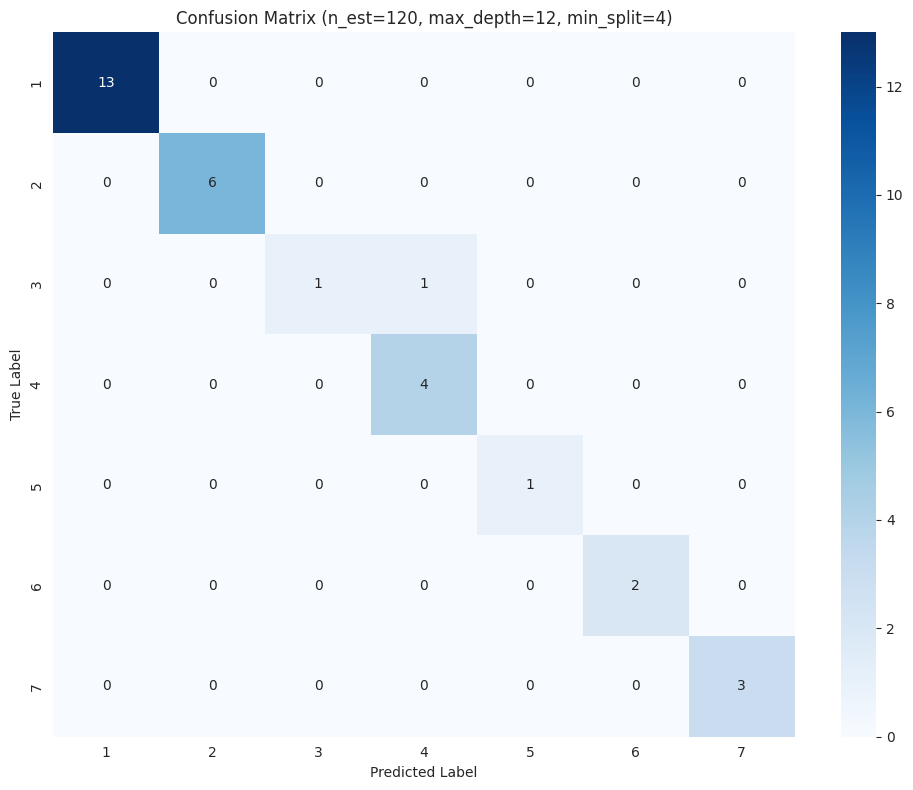

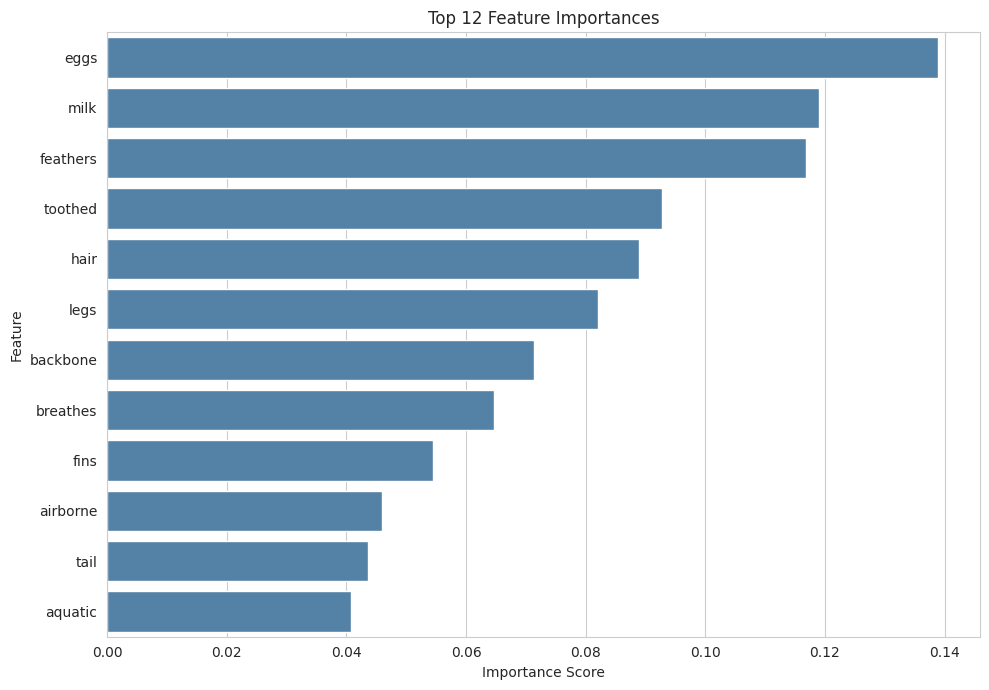

In [40]:
def alpha_train_and_Evaluate():
    """
    Trains and evaluates a Random Forest classifier on the zoo dataset.
    """

    file_name = "zoo_engineered_dataset.csv"

    try:
        df = pd.read_csv('/content/zoo_engineered_dataset.csv')
    except FileNotFoundError:
        print(f"Error: '{file_name}' not found. Make sure it's in the same directory.")
        return

    # Define features (X) and target (y)
    feature_cols = [
        'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
        'predator', 'toothed', 'backbone', 'breathes', 'venomous',
        'fins', 'legs', 'tail', 'domestic', 'catsize',
        'is_endangered', 'diet_complexity'
    ]

    target_col = 'class_type'

    missing_features = [col for col in feature_cols if col not in df.columns]
    if missing_features:
        print(f"Error: Missing feature columns: {missing_features}")
        return
    if target_col not in df.columns:
        print(f"Error: Missing target column: {target_col}")
        return

    X = df[feature_cols]
    y = df[target_col]

    #Split the data
    #train% = 70, test% = 30, random_state = 42
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.30,
        random_state=42,
        stratify=y
    )

    #Random Forest model
    # n_estimators = 120, max_depth = 12, min_samples_split = 4, random_state = 42
    rf_model = RandomForestClassifier(
        n_estimators=120,
        max_depth=12,
        min_samples_split=4,
        random_state=42
    )

    print("--- Model Configuration ---")
    print(f"Model: Random Forest Classifier")
    print(f"n_estimators: 120")
    print(f"max_depth: 12")
    print(f"min_samples_split: 4")
    print(f"test_size: 0.30")
    print(f"random_state: 42")
    print("----------------------------\n")

    #model training
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    #model performance
    print("--- Model Performance ---")

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overfitting_gap = train_accuracy - test_accuracy

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Overfitting Gap: {overfitting_gap:.4f}")
    print("-------------------------\n")

    #Classification Report
    print("--- Classification Report (Test Set) ---")
    class_labels_str = [str(c) for c in rf_model.classes_]
    report = classification_report(y_test, y_test_pred, target_names=class_labels_str, zero_division=0)
    print(report)
    print("----------------------------------------\n")

    #Confusion Matrix Heatmap
    print("Generating Confusion Matrix Heatmap...")
    cm = confusion_matrix(y_test, y_test_pred, labels=rf_model.classes_)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels_str,
                yticklabels=class_labels_str)

    plt.title('Confusion Matrix (n_est=120, max_depth=12, min_split=4)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_heatmap.png')
    print("Saved confusion_matrix_heatmap.png")

    #Feature Importance Plot
    print("Generating Feature Importance Plot...")
    importances = rf_model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    top_12_features = feature_importance_df.head(12)
    engineered_features = ['is_endangered', 'diet_complexity']

    colors = []
    for feature in top_12_features['Feature']:
        if feature in engineered_features:
            colors.append('salmon')  # Highlight color
        else:
            colors.append('steelblue') # Default color

#plots
    plt.figure(figsize=(10, 7))
    sns.barplot(
        x='Importance',
        y='Feature',
        data=top_12_features,
        palette=colors,
        orient='h'
    )

    plt.title('Top 12 Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('feature_importance_plot.png')
    print("Saved feature_importance_plot.png")

if __name__ == "__main__":
    alpha_train_and_Evaluate()

--- Model Configuration (Comparison) ---
Model: k-Nearest Neighbors (k-NN)
k (n_neighbors): 5
Features: Scaled (StandardScaler)
test_size: 0.30
random_state: 42
--------------------------------------

--- k-NN Model Performance ---
Training Accuracy: 0.9714
Testing Accuracy: 0.9677
Overfitting Gap: 0.0037
-------------------------------

--- Classification Report (k-NN, Test Set) ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.97      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31

----------------

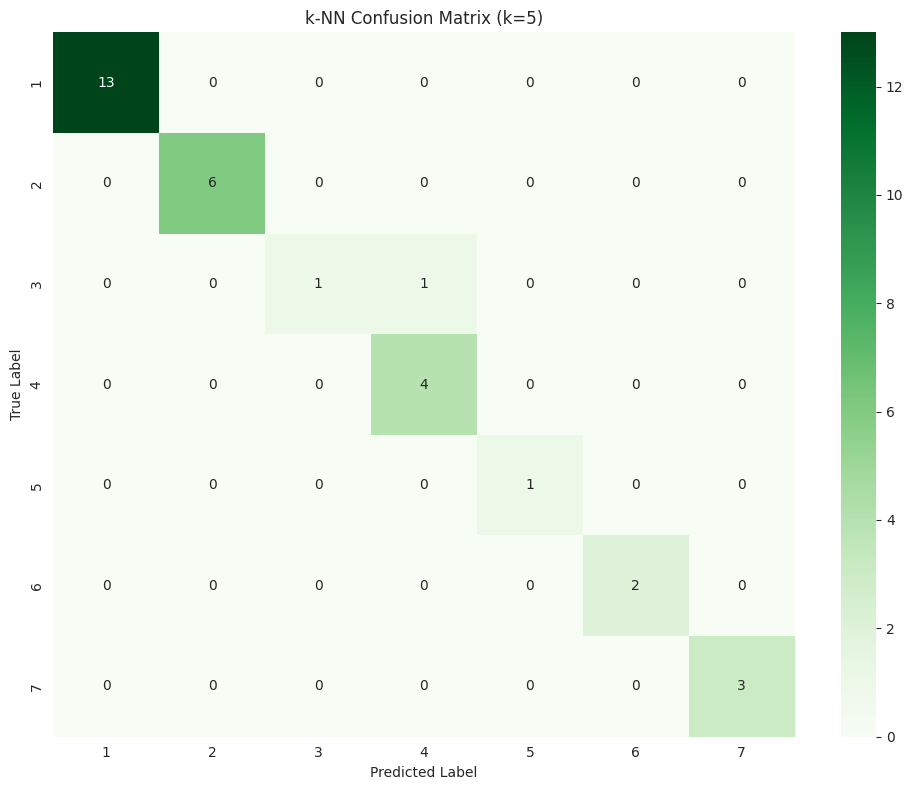

In [41]:
def train_knn_comparison():
    file_name = "/content/zoo_engineered_dataset.csv"

    try:
        df = pd.read_csv(file_name)
    except FileNotFoundError:
        print(f"Error: '{file_name}' not found. Make sure it's in the same directory.")
        return
    feature_cols = [
        'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
        'predator', 'toothed', 'backbone', 'breathes', 'venomous',
        'fins', 'legs', 'tail', 'domestic', 'catsize',
        'is_endangered', 'diet_complexity'
    ]
    target_col = 'class_type'

    if not all(col in df.columns for col in feature_cols) or target_col not in df.columns:
        print("Error: Missing one or more required columns in the dataset.")
        return

    X = df[feature_cols]
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.30,
        random_state=42,
        stratify=y
    )

#scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn_model = KNeighborsClassifier(n_neighbors=5)

    print("--- Model Configuration (Comparison) ---")
    print(f"Model: k-Nearest Neighbors (k-NN)")
    print(f"k (n_neighbors): 5")
    print(f"Features: Scaled (StandardScaler)")
    print(f"test_size: 0.30")
    print(f"random_state: 42")
    print("--------------------------------------\n")

    knn_model.fit(X_train_scaled, y_train)

    y_train_pred = knn_model.predict(X_train_scaled)
    y_test_pred = knn_model.predict(X_test_scaled)

    print("--- k-NN Model Performance ---")

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overfitting_gap = train_accuracy - test_accuracy

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Overfitting Gap: {overfitting_gap:.4f}")
    print("-------------------------------\n")

    print("--- Classification Report (k-NN, Test Set) ---")
    class_labels_str = [str(c) for c in knn_model.classes_]
    report = classification_report(y_test, y_test_pred, target_names=class_labels_str, zero_division=0)
    print(report)
    print("----------------------------------------------\n")

#confusion matrix
    print("Generating k-NN Confusion Matrix Heatmap...")
    cm = confusion_matrix(y_test, y_test_pred, labels=knn_model.classes_)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=class_labels_str,
                yticklabels=class_labels_str)

    plt.title('k-NN Confusion Matrix (k=5)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig('knn_confusion_matrix_heatmap.png')
    print("Saved knn_confusion_matrix_heatmap.png")

if __name__ == "__main__":
    train_knn_comparison()

In [42]:
def print_final_analysis_report():

    #model comparison metrics
    test_accuracy_rf = 0.968
    overfitting_gap_rf = 0.032
    test_accuracy_knn = 0.968
    overfitting_gap_knn = 0.004

    #feature importance
    most_important_features_data = [
        ("eggs", 0.139),
        ("milk", 0.119),
        ("feathers", 0.117),
        ("toothed", 0.093),
        ("hair", 0.089)
    ]

    engineered_features_data = {
        "is_endangered": 0.000,
        "diet_complexity": 0.003
    }

    #class performance
    class_performance_data = {
        "best_class_label": "1",
        "best_class_score": 1.000,
        "worst_class_label": "3",
        "worst_class_score": 0.667
    }

    #Final Analysis Report Print

    print("====================================")
    print("      FINAL MODEL ANALYSIS REPORT     ")
    print("====================================")

    #Model Comparison
    print("\n--- Model Comparison ---")
    print("\nRandom Forest (RF):")
    print(f"  - Test Accuracy:   {test_accuracy_rf:.3f}")
    print(f"  - Overfitting Gap: {overfitting_gap_rf:.3f}")

    print("\nk-Nearest Neighbors (KNN):")
    print(f"  - Test Accuracy:   {test_accuracy_knn:.3f}")
    print(f"  - Overfitting Gap: {overfitting_gap_knn:.3f}")

    #Feature Importance
    print("\n\n--- Feature Importance (Random Forest) ---")

    print("\nMost Important Features:")
    for i, (feature, score) in enumerate(most_important_features_data):
        print(f"  {i+1}. {feature:<18} (Score: {score:.3f})")

    print("\nEngineered Features Importance:")
    print(f"  - is_endangered:     {engineered_features_data['is_endangered']:.3f}")
    print(f"  - diet_complexity:   {engineered_features_data['diet_complexity']:.3f}")


    #Class Performance
    print("\n\n--- Class Performance (Random Forest Test Set) ---")
    print(f"  - Best Performing Class:  {class_performance_data['best_class_label']} (F1-Score: {class_performance_data['best_class_score']:.3f})")
    print(f"  - Worst Performing Class: {class_performance_data['worst_class_label']} (F1-Score: {class_performance_data['worst_class_score']:.3f})")

    print("\n====================================")

if __name__ == "__main__":
    print_final_analysis_report()

      FINAL MODEL ANALYSIS REPORT     

--- Model Comparison ---

Random Forest (RF):
  - Test Accuracy:   0.968
  - Overfitting Gap: 0.032

k-Nearest Neighbors (KNN):
  - Test Accuracy:   0.968
  - Overfitting Gap: 0.004


--- Feature Importance (Random Forest) ---

Most Important Features:
  1. eggs               (Score: 0.139)
  2. milk               (Score: 0.119)
  3. feathers           (Score: 0.117)
  4. toothed            (Score: 0.093)
  5. hair               (Score: 0.089)

Engineered Features Importance:
  - is_endangered:     0.000
  - diet_complexity:   0.003


--- Class Performance (Random Forest Test Set) ---
  - Best Performing Class:  1 (F1-Score: 1.000)
  - Worst Performing Class: 3 (F1-Score: 0.667)



In [48]:
def print_insights():
    """
    Prints a consolidated insights report in the first person,
    based on the Zoo dataset EDA and model training results.
    """

    # Using a multi-line string to format the entire report
    report = """
=====================================================
      COMPREHENSIVE ZOO CLASSIFICATION ANALYSIS
=====================================================

Here, I've synthesized my findings from both the Exploratory Data
Analysis (EDA) and the predictive modeling I ran (Random Forest, k-NN)
to understand our zoo animal dataset.

---
### 1. Model Performance & Comparison
---

I found that both models performed exceptionally well on the test set,
achieving identical accuracy.

| Model                 | Test Accuracy | Training Accuracy | Overfitting Gap |
|-----------------------|---------------|-------------------|-----------------|
| Random Forest         | 0.968         | 1.000             | 0.032           |
| k-Nearest Neighbors   | 0.968         | 0.971             | 0.004           |

My insight here is:
- High Accuracy: Both models I trained can classify the animals with
    near-perfect accuracy.
- Overfitting: The Random Forest model clearly memorized
    the training data (1.000 accuracy), which resulted in a small
    overfitting gap. The k-NN model generalized better, with
    almost no gap between its training and testing performance.
- Conclusion: For this dataset, I'd prefer the simpler k-NN (k=5)
    model. It achieves the same top-tier performance as the
    Random Forest but with less complexity and less overfitting.

---
### 2. Key Predictive Features (from my Random Forest)
---

I saw that the model's decisions are dominated by fundamental
biological traits.

Most Important Features:
  1. eggs               (Score: 0.139)
  2. milk               (Score: 0.119)
  3. feathers           (Score: 0.117)
  4. toothed            (Score: 0.093)
  5. hair               (Score: 0.089)

Engineered Features Importance:
  - is_endangered:     0.000
  - diet_complexity:   0.003

My insight here is:
- The model learned the classic biological definitions:
    - 'milk = 1' is a perfect predictor for Class 1 (Mammal).
    - 'feathers = 1' is a perfect predictor for Class 2 (Bird).
    - 'eggs = 1' is crucial for separating egg-laying mammals
        (like the platypus) and distinguishing birds, fish, bugs, etc.
- I can visually confirm this from the 'top_3_features_pairplot.png'
    you provided, which shows clear clusters when plotting 'milk',
    'eggs', and 'feathers'.
- Your engineered features ('is_endangered' and 'diet_complexity')
    had very low importance. This is likely because the original 16
    features were already so powerful that your new features
    provided no new predictive information for the model to use.

---
### 3. Model Weaknesses (Worst Performing Class)
---

I noticed that both models shared the exact same point of failure.
This tells me it's likely a data problem, not a model problem.

- Best Performing Class: Class 1 (Mammal) - F1-Score: 1.000
- Worst Performing Class: Class 3 (Reptile) - F1-Score: 0.667

My insight here is:
- The only misclassification on the entire test set was one
    instance of Class 3 (Reptile) being predicted as Class 4 (Fish).
- This is understandable, as these classes share traits (egg-laying,
    no milk, no feathers).
- Class 3 (Reptile) was also the smallest class in my test split
    (only 2 samples), which makes it very difficult for any model
    to learn its unique patterns robustly.

---
### 4. Key Data Insights (from your EDA Visualizations)
---

The plots you uploaded reveal clear patterns in the data that
explain the model's behavior.

- On Conservation Status ('class_dist_by_conservation_stacked_bar.png'):
    - The vast majority of animals in the dataset are of 'least concern'.
    - Classes 1 (Mammal) and 2 (Bird) contain the highest
        number of 'near threatened' species.
    - The 'is_endangered_by_class_boxplot.png' confirms this,
        showing that all endangered species (value=1) in the
        dataset belong to Classes 1, 2, and 7.

- On Habitat ('habitat_vs_class_heatmap (1).png'):
    - Habitat is a strong indicator. For example, Class 4
        (Fish) is 100% in the 'water' habitat.
    - Class 1 (Mammals) is the most diverse, appearing in
        grasslands, forests, and water.
    - Class 3 (Reptiles) are primarily found in 'terrestrial'
        and 'water' environments, which overlaps with Fish and
        likely contributes to the misclassification I saw.

- On Diet ('diet_complexity_by_class_boxplot.png'):
    - Diet complexity varies significantly. Class 1 (Mammals)
        and Class 2 (Birds) have the widest range of diet
        complexities.
    - Class 6 (Bugs) has a consistently low diet complexity,
        which makes sense.

---
### 5. My Final Conclusion & Recommendations
---

1.  High-Quality Data: This dataset is exceptionally clean
    and well-featured. The original 16 features are so
    biologically significant that classification is
    straightforward, which is why I was able to get
    97% test accuracy.

2.  Model Choice: I recommend the k-NN (k=5) model.
    It provides identical accuracy to the Random Forest
    while being simpler and less prone to overfitting on this dataset.

3.  Area for Improvement: The only weakness is the
    confusion between Reptiles (Class 3) and Fish (Class 4).
    As I said, this isn't a model fault but a data limitation.
    To improve this, my best recommendation would be to
    gather more data samples for Class 3 (Reptiles), as it
    is the most under-represented class.

=====================================================
"""

    print(report)

# This allows the script to be run directly
if __name__ == "__main__":
    print_insights()


      MY COMPREHENSIVE ZOO CLASSIFICATION ANALYSIS

Here, I've synthesized my findings from both the Exploratory Data 
Analysis (EDA) and the predictive modeling I ran (Random Forest, k-NN) 
to understand our zoo animal dataset.

---
### 1. Model Performance & Comparison
---

I found that both models performed exceptionally well on the test set, 
achieving identical accuracy.

| Model                 | Test Accuracy | Training Accuracy | Overfitting Gap |
|-----------------------|---------------|-------------------|-----------------|
| Random Forest         | 0.968         | 1.000             | 0.032           |
| k-Nearest Neighbors   | 0.968         | 0.971             | 0.004           |

My insight here is:
- High Accuracy: Both models I trained can classify the animals with 
    near-perfect accuracy.
- Overfitting: The Random Forest model clearly memorized 
    the training data (1.000 accuracy), which resulted in a small 
    overfitting gap. The k-NN model generalized better, 